# Assignment 4 
# Single Variable Linear Regression


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## Load the data from data file

In [24]:
cols = ['Sex','Length','Diameter','Height','Whole Weight', 'Shucked Weight','Viscera Weight','Shell Weight','Rings']
data = pd.read_csv(r"C:\Users\admin\Desktop\Data Science and Visualization\datasets\Abalone.data",names = cols)

In [25]:
data.head(5)

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Explore the shape of dataset

In [26]:
data.shape

(4177, 9)

## Summarize the properties in the training dataset.

In [27]:
data.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Check the dataset for any missing values, impute the missing
# values and also print out the correlation matrix.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [29]:
data.corr()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# Split the data 


In [30]:
x = data.iloc[:,1:8]
x.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [31]:
y = data.iloc[:,-1]
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [52]:
one = pd.Series(1, index = x.index , name='bias' )
one.head()
m = y.size
m

4177

In [37]:
# add column for bias term 
x['bias'] = one
x.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,bias
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


In [56]:
# assign theta
theta = np.array([10]*len(x.columns))
theta

array([10, 10, 10, 10, 10, 10, 10, 10])

In [57]:
#define hypothesis function
def hyp( theta , x):
    print( theta * x)
    return theta * x

In [58]:
def costfunc(x,y,theta,m):
    h = hyp(theta ,x)
    sum_y = np.sum(np.power((h - y) , 2) , axis = 1)
    print('\n Ypred \n',sum_y)
    return sum_y/(2*m)

In [59]:
costfunc(x , y , theta , m)

      Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0       4.55      3.65    0.95         5.140           2.245           1.010   
1       3.50      2.65    0.90         2.255           0.995           0.485   
2       5.30      4.20    1.35         6.770           2.565           1.415   
3       4.40      3.65    1.25         5.160           2.155           1.140   
4       3.30      2.55    0.80         2.050           0.895           0.395   
...      ...       ...     ...           ...             ...             ...   
4172    5.65      4.50    1.65         8.870           3.700           2.390   
4173    5.90      4.40    1.35         9.660           4.390           2.145   
4174    6.00      4.75    2.05        11.760           5.255           2.875   
4175    6.25      4.85    1.50        10.945           5.310           2.610   
4176    7.10      5.55    1.95        19.485           9.455           3.765   

      Shell Weight  bias  
0           

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4172    0.0
4173    0.0
4174    0.0
4175    0.0
4176    0.0
Length: 4177, dtype: float64

In [60]:
def gd(x, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hyp(theta, x)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(x.columns)):
            theta[c] = theta[c] - alpha*(np.sum((y1-y)*x.iloc[:,c])/len(x))
        j = costfunc(x, y, theta,m)
        J.append(j)
        k += 1
    return J, j, theta

In [61]:
J, j, theta = gd(x, y, theta, 0.05, 10)

      Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0       4.55      3.65    0.95         5.140           2.245           1.010   
1       3.50      2.65    0.90         2.255           0.995           0.485   
2       5.30      4.20    1.35         6.770           2.565           1.415   
3       4.40      3.65    1.25         5.160           2.155           1.140   
4       3.30      2.55    0.80         2.050           0.895           0.395   
...      ...       ...     ...           ...             ...             ...   
4172    5.65      4.50    1.65         8.870           3.700           2.390   
4173    5.90      4.40    1.35         9.660           4.390           2.145   
4174    6.00      4.75    2.05        11.760           5.255           2.875   
4175    6.25      4.85    1.50        10.945           5.310           2.610   
4176    7.10      5.55    1.95        19.485           9.455           3.765   

      Shell Weight  bias  
0           


 Ypred 
 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4172    0.0
4173    0.0
4174    0.0
4175    0.0
4176    0.0
Length: 4177, dtype: float64
      Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0      3.185     2.555   0.665        2.5700          1.5715          0.7070   
1      2.450     1.855   0.630        1.1275          0.6965          0.3395   
2      3.710     2.940   0.945        3.3850          1.7955          0.9905   
3      3.080     2.555   0.875        2.5800          1.5085          0.7980   
4      2.310     1.785   0.560        1.0250          0.6265          0.2765   
...      ...       ...     ...           ...             ...             ...   
4172   3.955     3.150   1.155        4.4350          2.5900          1.6730   
4173   4.130     3.080   0.945        4.8300          3.0730          1.5015   
4174   4.200     3.325   1.435        5.8800          3.6785          2.0125   
4175   4.375     3.395   1.05


 Ypred 
 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4172    0.0
4173    0.0
4174    0.0
4175    0.0
4176    0.0
Length: 4177, dtype: float64
      Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0       1.82      1.46    0.38         1.028           0.898           0.404   
1       1.40      1.06    0.36         0.451           0.398           0.194   
2       2.12      1.68    0.54         1.354           1.026           0.566   
3       1.76      1.46    0.50         1.032           0.862           0.456   
4       1.32      1.02    0.32         0.410           0.358           0.158   
...      ...       ...     ...           ...             ...             ...   
4172    2.26      1.80    0.66         1.774           1.480           0.956   
4173    2.36      1.76    0.54         1.932           1.756           0.858   
4174    2.40      1.90    0.82         2.352           2.102           1.150   
4175    2.50      1.94    0.6


 Ypred 
 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4172    0.0
4173    0.0
4174    0.0
4175    0.0
4176    0.0
Length: 4177, dtype: float64
      Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0      1.365     1.095   0.285        0.5140          0.6735          0.3030   
1      1.050     0.795   0.270        0.2255          0.2985          0.1455   
2      1.590     1.260   0.405        0.6770          0.7695          0.4245   
3      1.320     1.095   0.375        0.5160          0.6465          0.3420   
4      0.990     0.765   0.240        0.2050          0.2685          0.1185   
...      ...       ...     ...           ...             ...             ...   
4172   1.695     1.350   0.495        0.8870          1.1100          0.7170   
4173   1.770     1.320   0.405        0.9660          1.3170          0.6435   
4174   1.800     1.425   0.615        1.1760          1.5765          0.8625   
4175   1.875     1.455   0.45

In [62]:
y_hat = hyp(theta, x)
y_hat = np.sum(y_hat, axis=1)

      Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0      1.365     1.095   0.285        0.5140          0.6735          0.3030   
1      1.050     0.795   0.270        0.2255          0.2985          0.1455   
2      1.590     1.260   0.405        0.6770          0.7695          0.4245   
3      1.320     1.095   0.375        0.5160          0.6465          0.3420   
4      0.990     0.765   0.240        0.2050          0.2685          0.1185   
...      ...       ...     ...           ...             ...             ...   
4172   1.695     1.350   0.495        0.8870          1.1100          0.7170   
4173   1.770     1.320   0.405        0.9660          1.3170          0.6435   
4174   1.800     1.425   0.615        1.1760          1.5765          0.8625   
4175   1.875     1.455   0.450        1.0945          1.5930          0.7830   
4176   2.130     1.665   0.585        1.9485          2.8365          1.1295   

      Shell Weight  bias  
0           

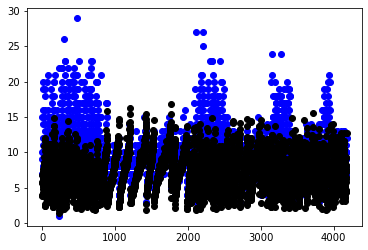

In [63]:
plt.figure()
plt.scatter(x=list(range(0, m)),y= y, color='blue')         
plt.scatter(x=list(range(0, m)), y=y_hat, color='black')
plt.show()